# TODO: Use GridSearch to search the best configuration for each model, and then compare them

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    accuracy_score,
    cohen_kappa_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC

from utils import (
    METRIC_COLUMNS,
    AdjacencyMethod,
    DistanceTransformation,
    Normalizer,
    get_dataset_filename,
)

## Configuration

In [12]:
event_filename = "all.txt"
input_data = True
use_threshold = True

dataset_df_conf1 = get_dataset_filename(
    event_filename=event_filename,
    input_data=input_data,
    use_threshold=use_threshold,
)

distance_transformation = DistanceTransformation.EXPONENTIAL
norm_method = Normalizer.Z_SCORE
adjacency_method = AdjacencyMethod.MANHATTAN

df0 = dataset_df_conf1[
    (dataset_df_conf1["transformation"] == distance_transformation.value)
    & (dataset_df_conf1["normalization"] == norm_method.value)
    & (dataset_df_conf1["adjacency_method"] == adjacency_method.value)
].sort_values(by="intensity")[[*METRIC_COLUMNS, "intensity"]].reset_index(drop=True)

X = df0[METRIC_COLUMNS].to_numpy()
y = df0["intensity"].to_numpy()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [40]:
y_test

array(['G4', 'G4', 'G5', 'G5', 'G3', 'G5', 'G4', 'G4', 'G5'], dtype=object)

In [46]:
LABELS = sorted(df0["intensity"].unique())

## SVM

In [41]:
clf_svc = SVC(kernel="rbf", gamma="scale")

In [42]:
clf_svc.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [43]:
y_pred_svc = clf_svc.predict(X_test)

print(y_test)
print(y_pred_svc)

['G4' 'G4' 'G5' 'G5' 'G3' 'G5' 'G4' 'G4' 'G5']
['G3' 'G4' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3']


SVC Classifier Performance:
Accuracy: 0.2222
Precision: 0.4583
Recall: 0.2222
F1 Score: 0.2025
Cohen's Kappa: 0.0870


/home/juand/Documents/vscode/DavidSierra/NMDB-FD-PredictorWithGraphs/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


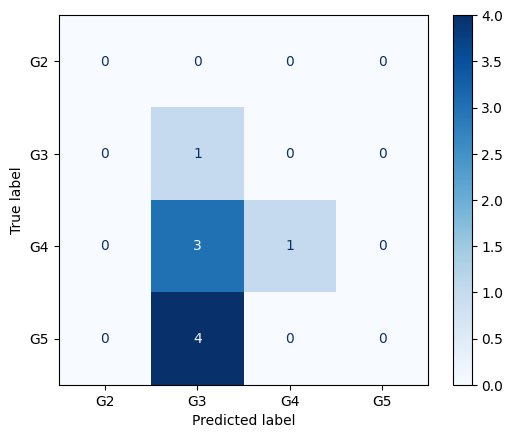

In [59]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc, average="weighted")
recall_svc = recall_score(y_test, y_pred_svc, average="weighted")
f1_svc = f1_score(y_test, y_pred_svc, average="weighted")
cohen_kappa_svc = cohen_kappa_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(
    y_test,
    y_pred_svc,
    labels=LABELS,
    normalize=None,
)

print("SVC Classifier Performance:")
print(f"Accuracy: {accuracy_svc:.4f}")
print(f"Precision: {precision_svc:.4f}")
print(f"Recall: {recall_svc:.4f}")
print(f"F1 Score: {f1_svc:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_svc:.4f}")

ConfusionMatrixDisplay(conf_matrix_svc, display_labels=LABELS).plot(cmap="Blues")

## LogisticRegression

In [50]:
clf_lg = LogisticRegression(solver="lbfgs", max_iter=1000, penalty="l2")

In [51]:
clf_lg.fit(X_train, y_train)

/home/juand/Documents/vscode/DavidSierra/NMDB-FD-PredictorWithGraphs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l2'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass`

In [52]:
y_pred_lg = clf_lg.predict(X_test)

print(y_test)
print(y_pred_lg)

['G4' 'G4' 'G5' 'G5' 'G3' 'G5' 'G4' 'G4' 'G5']
['G3' 'G3' 'G4' 'G4' 'G4' 'G3' 'G4' 'G3' 'G4']


LogisticRegression Classifier Performance:
Accuracy: 0.1111
Precision: 0.0889
Recall: 0.1111
F1 Score: 0.0988
Cohen's Kappa: -0.2632


/home/juand/Documents/vscode/DavidSierra/NMDB-FD-PredictorWithGraphs/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


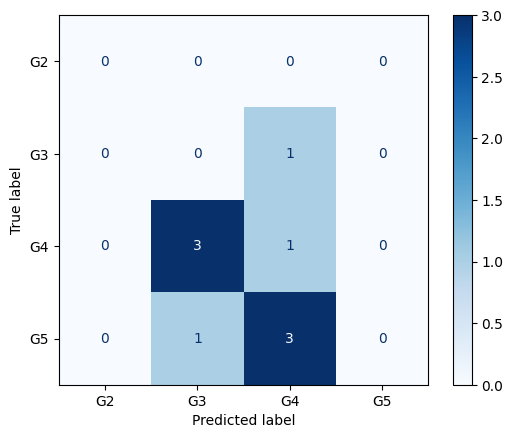

In [60]:
accuracy_lg = accuracy_score(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg, average="weighted")
recall_lg = recall_score(y_test, y_pred_lg, average="weighted")
f1_lg = f1_score(y_test, y_pred_lg, average="weighted")
cohen_kappa_lg = cohen_kappa_score(y_test, y_pred_lg)
conf_matrix_lg = confusion_matrix(
    y_test,
    y_pred_lg,
    labels=LABELS,
    normalize=None,
)

print("LogisticRegression Classifier Performance:")
print(f"Accuracy: {accuracy_lg:.4f}")
print(f"Precision: {precision_lg:.4f}")
print(f"Recall: {recall_lg:.4f}")
print(f"F1 Score: {f1_lg:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_lg:.4f}")

ConfusionMatrixDisplay(conf_matrix_lg, display_labels=LABELS).plot(cmap="Blues")

### Categorical Naive Bayes

In [61]:
clf_nb = CategoricalNB()

In [62]:
clf_nb.fit(X_train, y_train)

,"alpha alpha: float, default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"min_categories min_categories: int or array-like of shape (n_features,), default=NoneMinimum number of categories per feature.- integer: Sets the minimum number of categories per feature to `n_categories` for each features.- array-like: shape (n_features,) where `n_categories[i]` holds the minimum number of categories for the ith column of the input.- None (default): Determines the number of categories automatically from the training data... versionadded:: 0.24",None


In [63]:
y_pred_nb = clf_nb.predict(X_test)

print(y_test)
print(y_pred_nb)

['G4' 'G4' 'G5' 'G5' 'G3' 'G5' 'G4' 'G4' 'G5']
['G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G4']


CategoricalNB Classifier Performance:
Accuracy: 0.1111
Precision: 0.0139
Recall: 0.1111
F1 Score: 0.0247
Cohen's Kappa: -0.0435


/home/juand/Documents/vscode/DavidSierra/NMDB-FD-PredictorWithGraphs/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


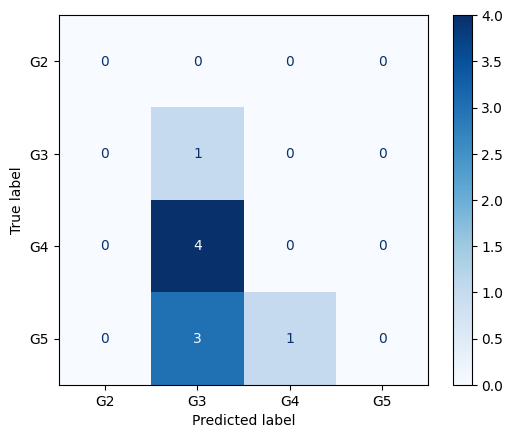

In [64]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average="weighted")
recall_nb = recall_score(y_test, y_pred_nb, average="weighted")
f1_nb = f1_score(y_test, y_pred_nb, average="weighted")
cohen_kappa_nb = cohen_kappa_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(
    y_test,
    y_pred_nb,
    labels=LABELS,
    normalize=None,
)

print("CategoricalNB Classifier Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")
print(f"Cohen's Kappa: {cohen_kappa_nb:.4f}")

ConfusionMatrixDisplay(conf_matrix_nb, display_labels=LABELS).plot(cmap="Blues")

I know, all these models aren't enough, we must configure each hyperparameter, but it's just an initial version, we're only doing some testing